In [106]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from abmax.structs import Params
from matplotlib.patches import FancyArrowPatch

import seaborn as sns
sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

RENDER_DATA_PATH = "./data/sheep_wolf_data3/"
MAX_SPAWN_X = 600.0 # max x in spawning arena
MAX_SPAWN_Y = 600.0 # max y in spawning arena
SHEEP_RADIUS = 5.0
WOLF_RADIUS = 5.0
EP_LEN = 3000
NUM_SHEEP = 30
NUM_WOLF = 30

In [107]:
def load_render_data(filenames):
    return {name: jnp.load(RENDER_DATA_PATH + fname) for name, fname in filenames.items()}

file_map = {
    'sheep_xs': 'rendering_sheep_xs.npy',
    'sheep_ys': 'rendering_sheep_ys.npy',
    'sheep_angs': 'rendering_sheep_angs.npy',
    'sheep_energy': 'rendering_sheep_energy.npy',
    'wolf_xs': 'rendering_wolf_xs.npy',
    'wolf_ys': 'rendering_wolf_ys.npy',
    'wolf_angs': 'rendering_wolf_angs.npy',
    'wolf_energy': 'rendering_wolf_energy.npy',
}

data = load_render_data(file_map)

In [108]:
print(*(f"{k}: {v.shape}" for k, v in data.items()))

sheep_xs: (5, 5, 3000, 30, 1) sheep_ys: (5, 5, 3000, 30, 1) sheep_angs: (5, 5, 3000, 30, 1) sheep_energy: (5, 5, 3000, 30, 1) wolf_xs: (5, 5, 3000, 30, 1) wolf_ys: (5, 5, 3000, 30, 1) wolf_angs: (5, 5, 3000, 30, 1) wolf_energy: (5, 5, 3000, 30, 1)


In [109]:
def select_episode(data, env_idx, ep_idx):
    """Select a single environment and episode from the full dataset."""
    sheep_xs = jnp.squeeze(data['sheep_xs'][env_idx, ep_idx])
    sheep_ys = jnp.squeeze(data['sheep_ys'][env_idx, ep_idx])
    sheep_angs = jnp.squeeze(data['sheep_angs'][env_idx, ep_idx])
    sheep_energy = jnp.squeeze(data['sheep_energy'][env_idx, ep_idx])

    wolf_xs = jnp.squeeze(data['wolf_xs'][env_idx, ep_idx])
    wolf_ys = jnp.squeeze(data['wolf_ys'][env_idx, ep_idx])
    wolf_angs = jnp.squeeze(data['wolf_angs'][env_idx, ep_idx])
    wolf_energy = jnp.squeeze(data['wolf_energy'][env_idx, ep_idx])

    return {
        'sheep_xs': sheep_xs,
        'sheep_ys': sheep_ys,
        'sheep_angs': sheep_angs,
        'sheep_energy': sheep_energy,
        'wolf_xs': wolf_xs,
        'wolf_ys': wolf_ys,
        'wolf_angs': wolf_angs,
        'wolf_energy': wolf_energy
    }
env_idx, ep_idx = 3, 3
episode_data = select_episode(data, env_idx, ep_idx)

print(*(f"{k}: {v.shape}" for k, v in episode_data.items()))

sheep_xs: (3000, 30) sheep_ys: (3000, 30) sheep_angs: (3000, 30) sheep_energy: (3000, 30) wolf_xs: (3000, 30) wolf_ys: (3000, 30) wolf_angs: (3000, 30) wolf_energy: (3000, 30)


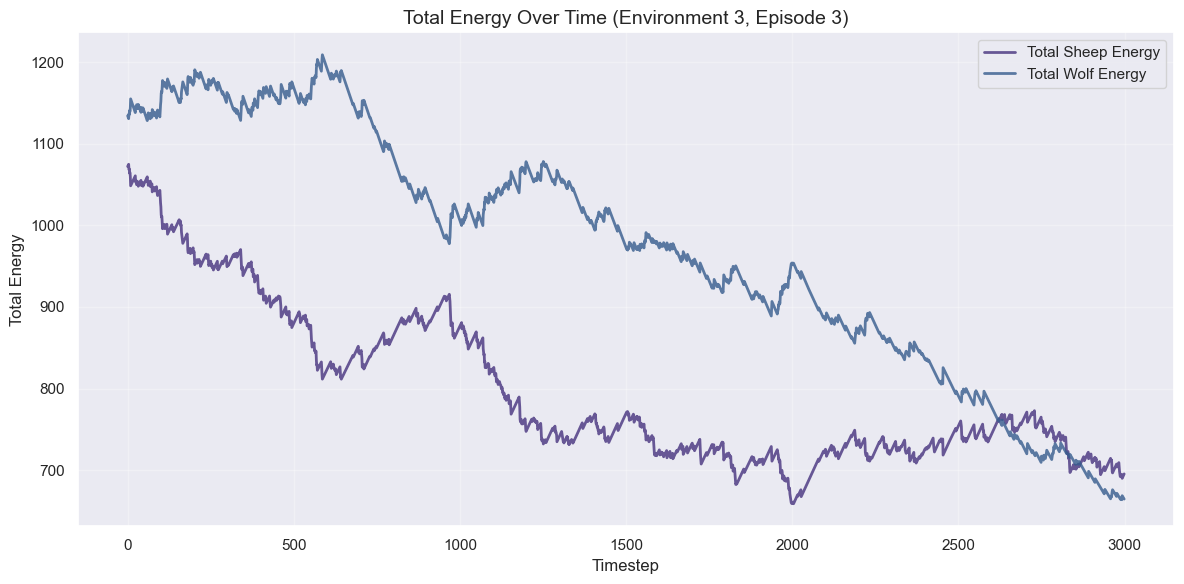

Sheep Energy - Start: 1072.12, End: 695.50, Change: -376.62
Wolf Energy - Start: 1134.29, End: 664.70, Change: -469.59


In [110]:
# Plot total energy for both species over time
def plot_total_energy(episode_data):
    """Plot total energy (sum across all individuals) for sheep and wolves over time."""
    # calculate total energy for each species at each timestep
    total_sheep_energy = jnp.sum(episode_data['sheep_energy'], axis=1)  # sum over all sheep
    total_wolf_energy = jnp.sum(episode_data['wolf_energy'], axis=1)    # sum over all wolves

    ts = jnp.arange(EP_LEN)

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(ts, total_sheep_energy, label='Total Sheep Energy', linewidth=2, alpha=0.8)
    ax.plot(ts, total_wolf_energy, label='Total Wolf Energy', linewidth=2, alpha=0.8)

    ax.set_xlabel('Timestep', fontsize=12)
    ax.set_ylabel('Total Energy', fontsize=12)
    ax.set_title(f'Total Energy Over Time (Environment {env_idx}, Episode {ep_idx})', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Sheep Energy - Start: {total_sheep_energy[0]:.2f}, End: {total_sheep_energy[-1]:.2f}, Change: {total_sheep_energy[-1] - total_sheep_energy[0]:.2f}")
    print(f"Wolf Energy - Start: {total_wolf_energy[0]:.2f}, End: {total_wolf_energy[-1]:.2f}, Change: {total_wolf_energy[-1] - total_wolf_energy[0]:.2f}")


plot_total_energy(episode_data)
# random movement